# Task_1 (TITANIC SURVIVAL PREDICTION)

**Import Library**

In [1]:
#Import Library
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score as score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import linear_model
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

**Load Data**

In [2]:
titanic_data=pd.read_csv("/kaggle/input/test-file/tested.csv")

**Understand Data**

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
titanic_data.shape

(418, 12)

In [5]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


<Axes: >

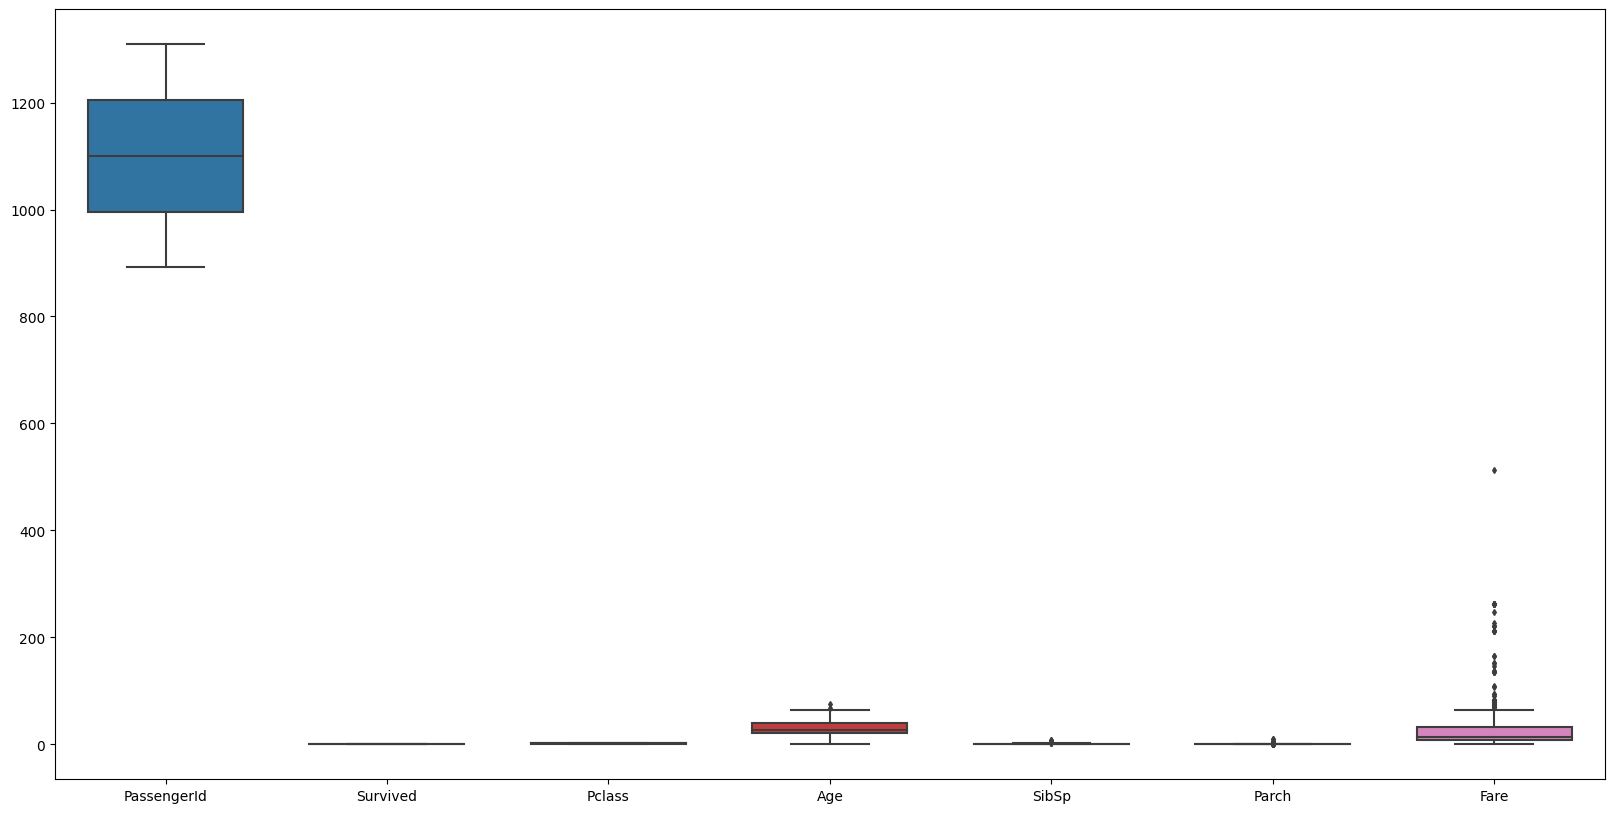

In [7]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=titanic_data, width= 0.7,ax=ax,  fliersize=3)

**check Null Values**

In [8]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**check duplicated values**

In [9]:
titanic_data.duplicated().sum()

0

**fill Null Values with Methods such as Median and Mean**

In [10]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].median(),inplace=True)

**Deleting redundant columns.**

In [11]:
titanic_data.drop(columns={'PassengerId','Name','Cabin','Ticket'},inplace=True)

# Data Visualization

<Axes: ylabel='Survived'>

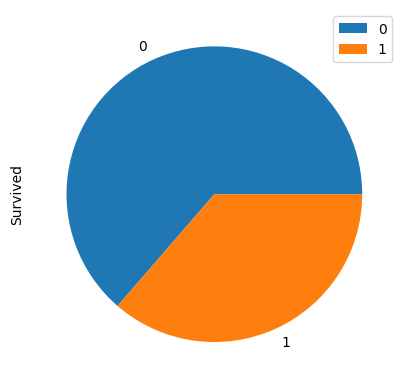

In [12]:
titanic_data.groupby(['Survived']).agg({'Survived':'count'}).plot(kind='pie', y='Survived')

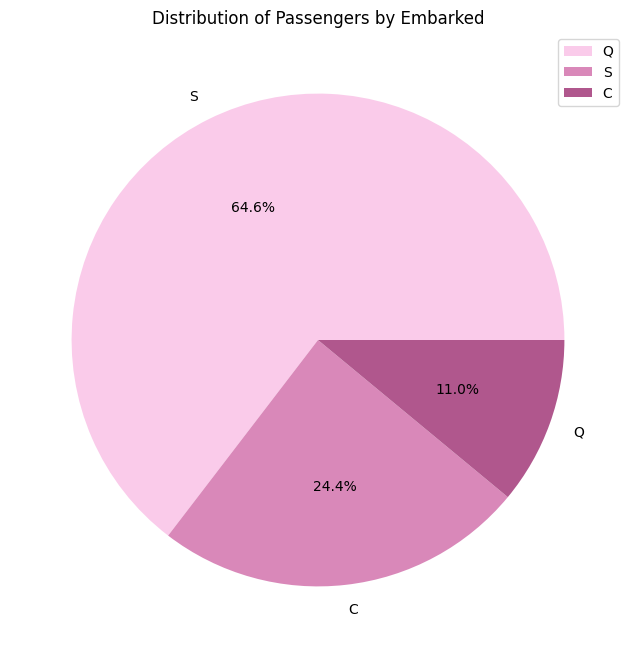

In [13]:
Embarked_Value_counts = titanic_data['Embarked'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(Embarked_Value_counts, labels=Embarked_Value_counts.index, autopct='%1.1f%%', colors=['#FACBEA', '#D988B9', '#B0578D'])
plt.title("Distribution of Passengers by Embarked")
plt.legend(["Q", "S", "C"])
plt.show()

[]

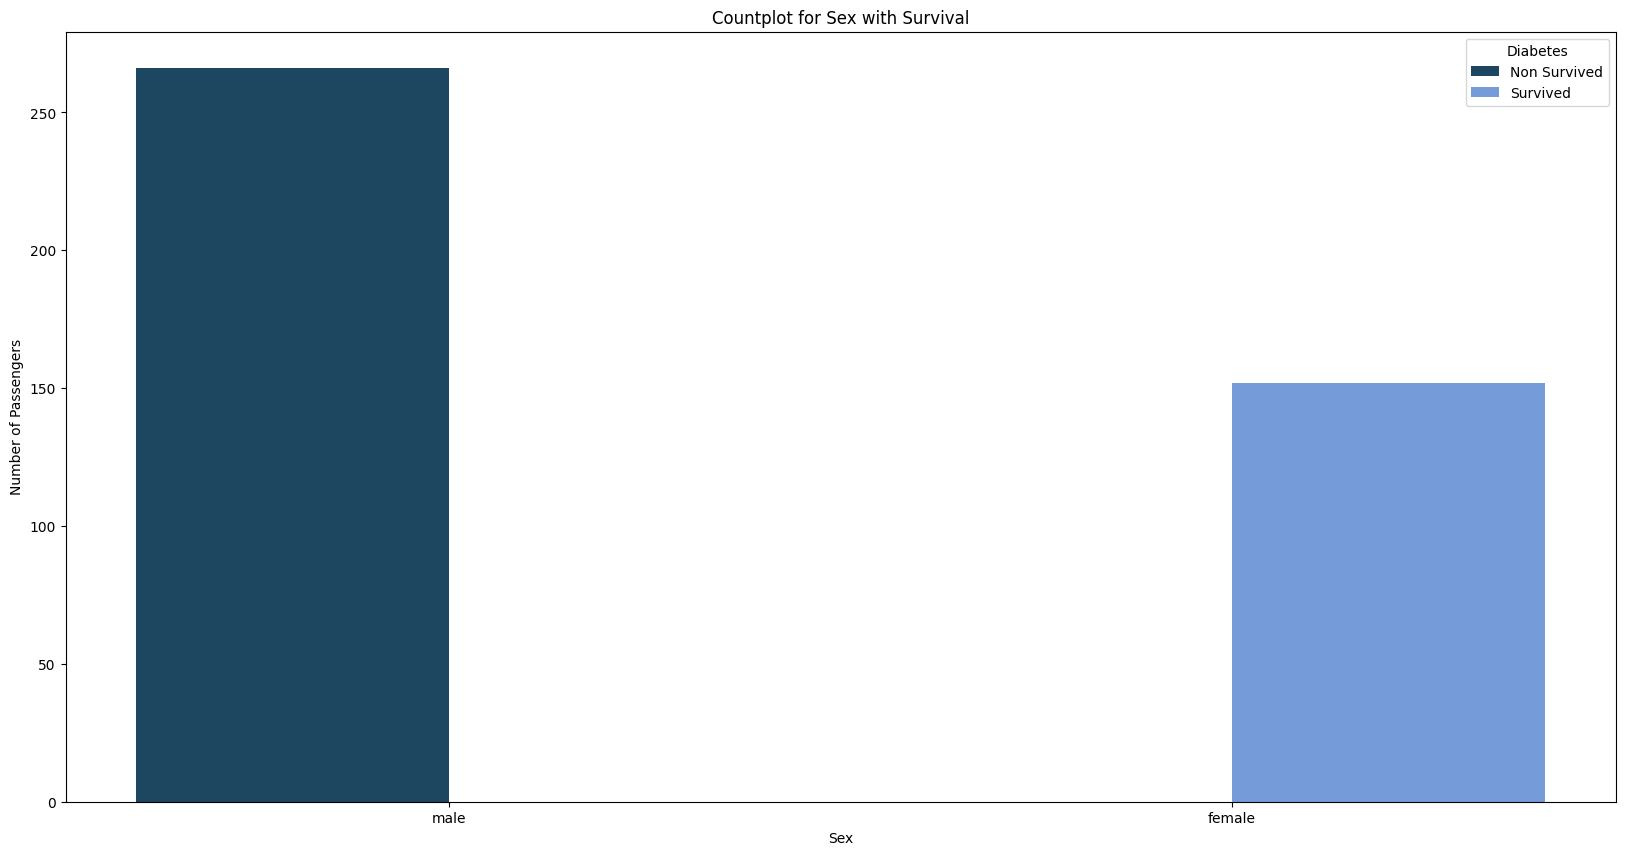

In [14]:
_, ax = plt.subplots(figsize = (20, 10))
sns.countplot(data = titanic_data, x = "Sex", hue = "Survived",palette=[ "#12486B","#6499E9"], ax = ax)
ax.set_title("Countplot for Sex with Survival")
ax.set_xlabel("Sex")

ax.set_ylabel("Number of Passengers")
ax.legend(title = "Diabetes", labels = ["Non Survived", "Survived"])
plt.plot()

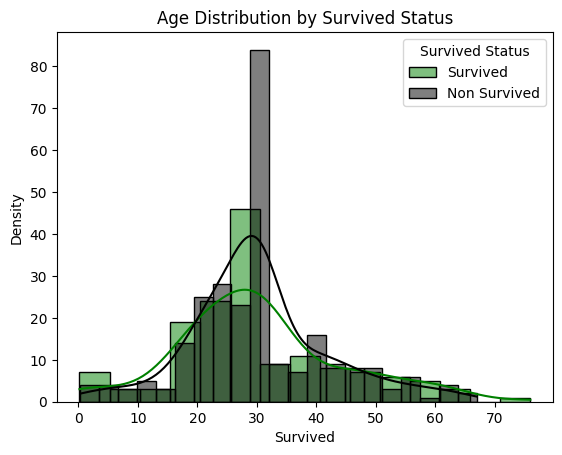

In [15]:
sns.histplot(data=titanic_data[titanic_data['Survived'] == 1], x='Age', kde=True, color='green', label='Survived')
sns.histplot(data=titanic_data[titanic_data['Survived']== 0], x='Age', kde=True, color='black', label='Non Survived')
plt.xlabel('Survived')
plt.ylabel('Density')
plt.title('Age Distribution by Survived Status')
plt.legend(title='Survived Status')
plt.show()

[]

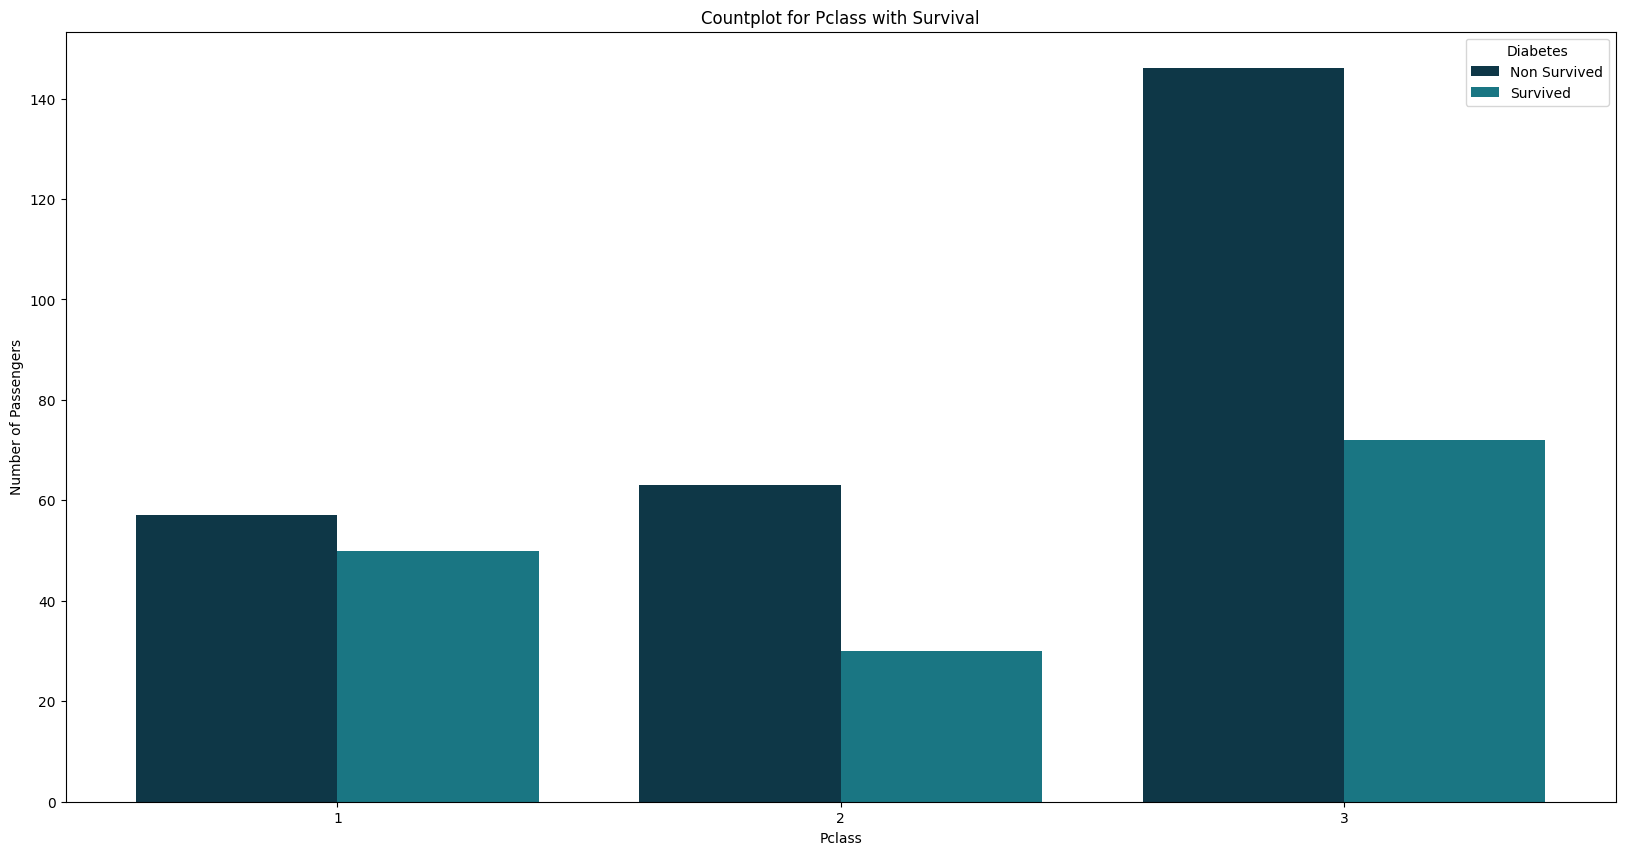

In [16]:
_, ax = plt.subplots(figsize = (20, 10))
sns.countplot(data = titanic_data, x = "Pclass", hue = "Survived",palette=["#053B50", "#088395"], ax = ax)
ax.set_title("Countplot for Pclass with Survival")
ax.set_xlabel("Pclass")

ax.set_ylabel("Number of Passengers")
ax.legend(title = "Diabetes", labels = ["Non Survived", "Survived"])
plt.plot()

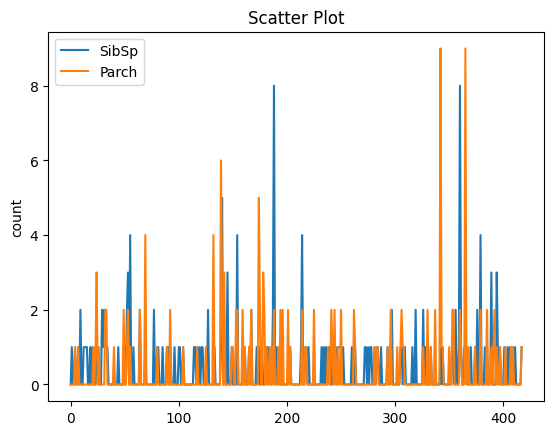

In [17]:
plt.plot(titanic_data['SibSp'])
plt.plot(titanic_data['Parch'])
plt.title("Scatter Plot")
plt.ylabel('count')
plt.legend(["SibSp", "Parch"])
plt.show()

**Apply some Transformation to convert Category column to Numeric**

In [18]:
LE=LabelEncoder()
titanic_data['Sex']=LE.fit_transform(titanic_data['Sex'])
titanic_data['Embarked']=LE.fit_transform(titanic_data['Embarked'])

In [19]:
titanic_data.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

**Convert datetype of columns Age and Fare fron float to int**

In [20]:
titanic_data['Age']=titanic_data['Age'].astype(int)
titanic_data['Fare']=titanic_data['Fare'].astype(int)

<Axes: >

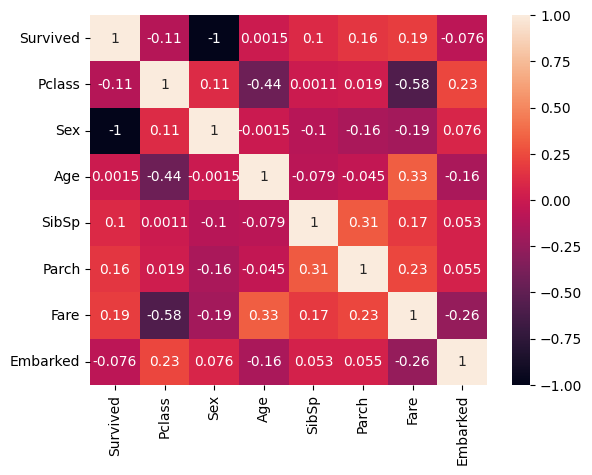

In [21]:
sns.heatmap(titanic_data.corr(),annot=True)

**Feature Selection**

In [22]:
X=titanic_data.drop('Survived',axis=1)
Y=titanic_data.iloc[:,0]

**Split Data**

In [23]:
X_Train,X_Test,Y_train,Y_Test=train_test_split(X,Y,test_size=0.2)

**Build Models**

In [24]:
LR_Model=linear_model.LogisticRegression()
LR_Model.fit(X_Train,Y_train)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
LR_predicted = LR_Model.predict(X_Test)

In [26]:
print("Accuracy = {:0.2f}%".format(score(LR_predicted, Y_Test)*100))
print('Recall: %.1f' % recall_score(Y_Test, LR_predicted))
print('Precision: %.1f' % precision_score(Y_Test, LR_predicted))
print('F1 Score: %.1f' % f1_score(Y_Test, LR_predicted))


Accuracy = 100.00%
Recall: 1.0
Precision: 1.0
F1 Score: 1.0


In [27]:

SVM_Model = svm.SVC(kernel='linear') 
SVM_Model.fit(X_Train,Y_train)
SVM_predicted = SVM_Model.predict(X_Test)

In [28]:
print("Accuracy = {:0.2f}%".format(score(SVM_predicted, Y_Test)*100))
print('Recall: %.1f' % recall_score(Y_Test, SVM_predicted))
print('Precision: %.1f' % precision_score(Y_Test, SVM_predicted))
print('F1 Score: %.1f' % f1_score(Y_Test, SVM_predicted))

Accuracy = 100.00%
Recall: 1.0
Precision: 1.0
F1 Score: 1.0


In [29]:
clf_Model = DecisionTreeClassifier()
clf_Model = clf_Model.fit(X_Train,Y_train)
DT_predicted= clf_Model.predict(X_Test)

In [30]:
print("Accuracy = {:0.2f}%".format(score(DT_predicted, Y_Test)*100))
print('Recall: %.1f' % recall_score(Y_Test, DT_predicted))
print('Precision: %.1f' % precision_score(Y_Test, DT_predicted))
print('F1 Score: %.1f' % f1_score(Y_Test, DT_predicted))

Accuracy = 100.00%
Recall: 1.0
Precision: 1.0
F1 Score: 1.0
